## shape of results depends on index array

In [3]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size = 10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [4]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [5]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [6]:
mat = np.arange(12).reshape((3, 4))
print(mat)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [9]:
mat[[0, 1, 2], [2, 1, 3]] # pairwise accessing

array([ 2,  5, 11])

In [10]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])

In [11]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [13]:
mat[row[:, np.newaxis], col] # broadcasting rules

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [15]:
mat[1:, [2, 0, 1]] # combined slicing and fancy indexing

array([[ 6,  4,  5],
       [10,  8,  9]])

In [16]:
mat

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [17]:
mask = np.array([1, 0, 1, 0], dtype=bool)
mat[row[:, np.newaxis], mask] # combine fancy indexing with mask


array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [21]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

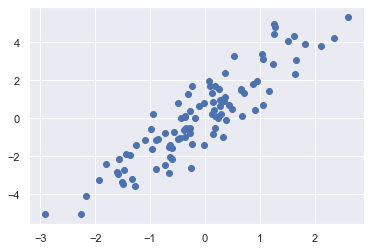

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);


In [25]:
indices = np.random.choice(X.shape[0], 20, replace = False) # choose from np.arange(int)

In [27]:
indices

array([27, 54,  6, 87, 30, 37, 70, 16, 26, 19, 18, 56, 96, 43,  9, 94, 23,
       88, 72, 13])

In [37]:
selection = X[indices] # select the rows

In [38]:
selection.shape

(20, 2)

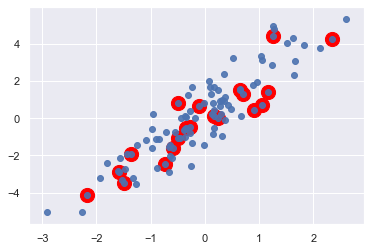

In [47]:
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='red', s=200);
plt.scatter(X[:, 0], X[:, 1], alpha=0.9)



## binning data

In [86]:
np.random.seed(42)
x = np.random.randn(100)
# x[0] = -6
# x[1] = -4.9
bins = np.linspace(-5, 5, 20)

In [87]:
counts = np.zeros_like(bins) # return zeros array with the same shape as bins
i = np.searchsorted(bins, x) # find the appropriate bin for each x

In [89]:
# add 1 to each of these bins
np.add.at(counts, i, 1) # sequence adding 1

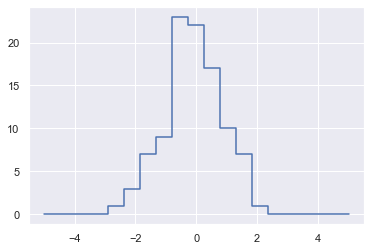

In [98]:
# plot the results
plt.plot(bins, counts, drawstyle='steps');

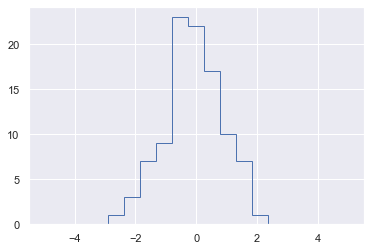

In [95]:
plt.hist(x, bins, histtype='step');

In [106]:
counts, edges = np.histogram(x, bins) # like matlab can simultenously store two elements results

('t', 5)

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])